In [ ]:
!pip install ucimlrepo

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.preprocessing import minmax_scaling
import tensorflow as  tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, confusion_matrix, roc_curve, auc

# fetch dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

# metadata
print(dry_bean_dataset.metadata)

# variable information
print(dry_bean_dataset.variables)


{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [ ]:
X.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061


In [ ]:
y.head(10)

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
5,SEKER
6,SEKER
7,SEKER
8,SEKER
9,SEKER


In [ ]:
X.isnull().any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRatio        False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
Roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
dtype: bool

In [ ]:
#Label encoding
labelEncoder = LabelEncoder()
labelEncoder.fit(y)
labelEncoded_Y = labelEncoder.transform(y)

y = labelEncoded_Y
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([5, 5, 5, ..., 3, 3, 3])

In [ ]:
#Area	Perimeter	MajorAxisLength	MinorAxisLength	AspectRatio ConvexArea	EquivDiameter

X['Area'] = minmax_scaling( X['Area'], columns=[0])
X['Perimeter'] = minmax_scaling( X['Perimeter'], columns=[0])
X['MajorAxisLength'] = minmax_scaling( X['MajorAxisLength'], columns=[0])
X['MinorAxisLength'] = minmax_scaling( X['MinorAxisLength'], columns=[0])
X['AspectRatio'] = minmax_scaling( X['AspectRatio'], columns=[0])
X['ConvexArea'] = minmax_scaling( X['ConvexArea'], columns=[0])
X['EquivDiameter'] = minmax_scaling( X['EquivDiameter'], columns=[0])
X.head()

/usr/local/lib/python3.10/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
<ipython-input-7-d4f39781ec87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Area'] = minmax_scaling( X['Area'], columns=[0])
<ipython-input-7-d4f39781ec87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Per

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.549812,0.033107,0.070804,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.411785,0.034991,0.073577,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.562727,0.037126,0.078816,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.498616,0.041389,0.083854,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.333680,0.040123,0.084906,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size = 0.2, random_state=1)

#implementing a desition tree
bean_model_desicionTree = DecisionTreeClassifier(random_state=1)
bean_model_desicionTree.fit(X_train_DT, y_train_DT)

y_pred_DT = bean_model_desicionTree.predict(X_test_DT)


X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.2, random_state=1)

#implementing logistic regresion
beanLR_model_logisticRegresion = LogisticRegression()
beanLR_model_logisticRegresion.fit(X_train_LR,y_train_LR)


y_pred_model2 = beanLR_model_logisticRegresion.predict(X_test_LR)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#implementing neural network
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y, test_size=0.15, random_state=1)
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train_NN, y_train_NN, test_size=0.05, random_state=1)

def get_nn_model_function1(n_inputs, n_outputs):
  nn_model = Sequential()

  nn_model.add(tf.keras.layers.Dense(50, activation = 'relu'))
  nn_model.add(tf.keras.layers.Dense(100, activation = 'relu'))
  nn_model.add(tf.keras.layers.Dense(50, activation = 'relu'))
  nn_model.add(tf.keras.layers.Dense(1))

  nn_model.compile('SGD', loss = 'mse', metrics = ['mse'])

  return nn_model

def get_nn_model_function2(n_inputs, n_outputs):
  network = Sequential()

  network.add(Dense(n_inputs, input_shape=(n_inputs,), kernel_initializer = 'normal', activation = 'relu'))
  network.add(Dense(16, activation = "relu"))
  network.add(Dense(6, activation = "relu"))
  network.add(Dense(4, activation = "relu"))

  network.add(Dense(n_outputs, activation = "relu"))
  network.compile('SGD', loss = 'mse', metrics = ['mse'])
  return network

In [ ]:

n_inputs = X_train_NN.shape[1]
n_outputs = 1

nn_model = get_nn_model_function2(n_inputs, n_outputs)


In [ ]:
nn_model.fit(X_train_NN, y_train_NN, verbose = 1, epochs = 20, batch_size = 0, validation_data = (X_val_NN, y_val_NN))

Epoch 1/20
344/344 [==============================] - 1s 2ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 2/20
344/344 [==============================] - 1s 2ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 3/20
344/344 [==============================] - 1s 1ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 4/20
344/344 [==============================] - 0s 1ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 5/20
344/344 [==============================] - 1s 2ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 6/20
344/344 [==============================] - 1s 2ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 7/20
344/344 [==============================] - 1s 2ms/step - loss: 15.7977 - mse: 15.7977 - val_loss: 15.9741 - val_mse: 15.9741
Epoch 8/20
344/344 [============================

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = nn_model.evaluate(X_test_NN, y_test_NN, verbose=0)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


Test loss: 15.92017650604248
Test accuracy: 15.92017650604248


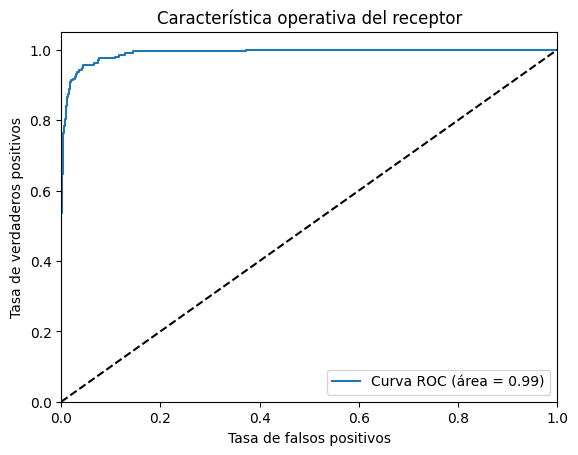

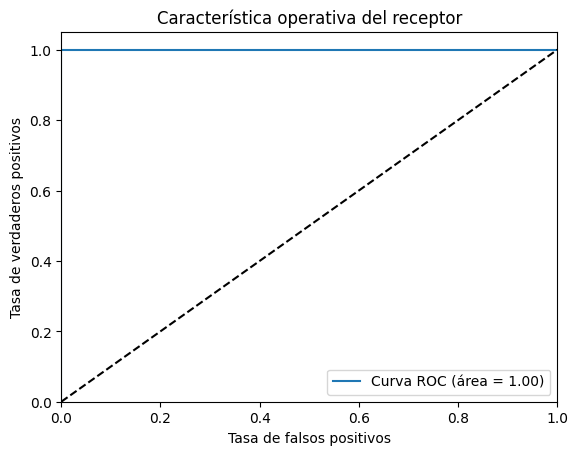

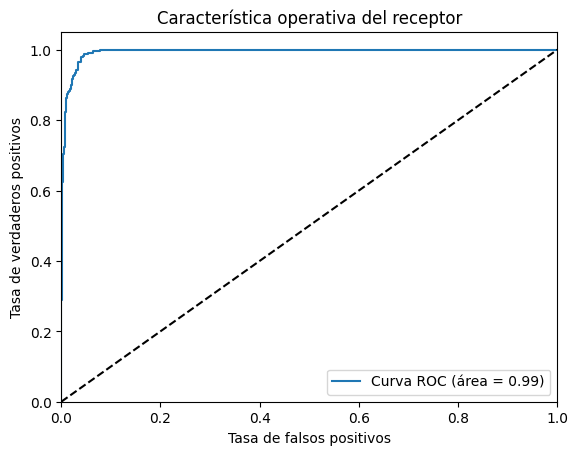

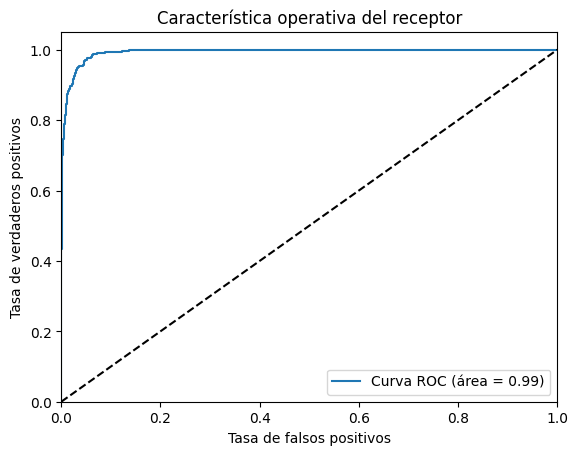

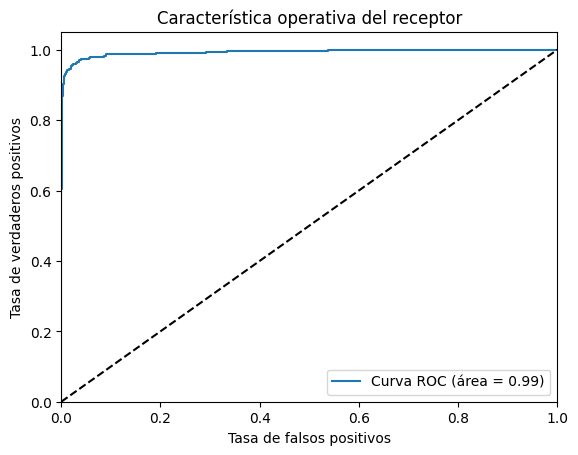

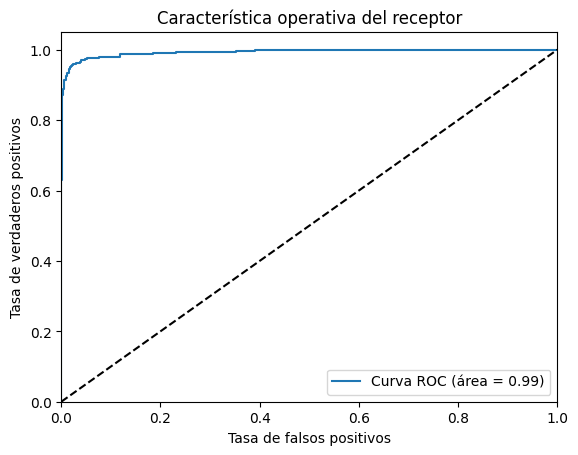

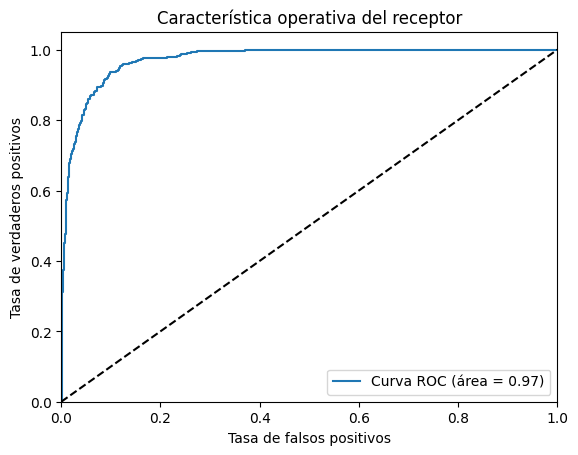

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

# Crear el clasificador One-vs-Rest
clf = OneVsRestClassifier(SVC()).fit(X_train_NN, y_train_NN)

# Realizar predicciones
y_pred = clf.predict(X_test_NN)

# Ajusta el clasificador y obtén las puntuaciones de decisión
y_score = clf.decision_function(X_test_NN)

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
y_bin = label_binarize(y_test_NN, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_bin.shape[1]

# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Trazar la curva ROC para una clase específica
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='Curva ROC (área = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Característica operativa del receptor')
    plt.legend(loc="lower right")
    plt.show()

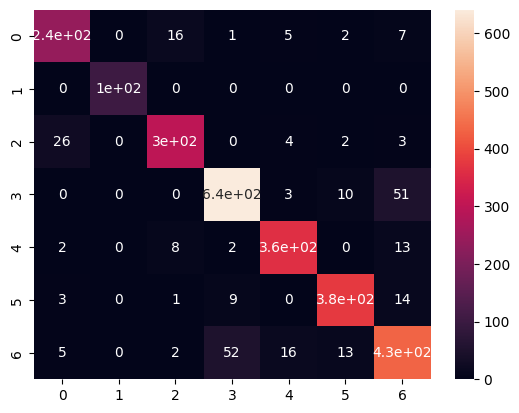

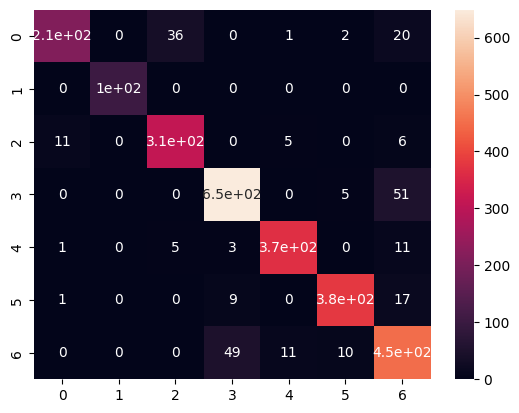

In [ ]:
from sklearn.metrics import confusion_matrix


def graficar_matriz_confusion(actual_data,prediccion):

    matriz_confusion = confusion_matrix(actual_data, prediccion)

    sns.heatmap(matriz_confusion, annot=True)

    plt.show()

graficar_matriz_confusion(y_test_DT, y_pred_DT)
graficar_matriz_confusion(y_test_LR, y_pred_model2)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test_DT, y_pred_DT)
report1 = classification_report(y_test_LR, y_pred_model2)


print(report)
print(report1)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       270
           1       1.00      1.00      1.00       103
           2       0.92      0.89      0.91       333
           3       0.91      0.91      0.91       705
           4       0.93      0.94      0.93       386
           5       0.93      0.93      0.93       405
           6       0.83      0.83      0.83       521

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       270
           1       1.00      1.00      1.00       103
           2       0.88      0.93      0.91       333
           3       0.91      0.92      0.92       705
           4       0.96      0.95      0.95       386
           5       0.96      0.93      0.95       405
           6       0.81 